In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# read data set
ransomware_data = pd.read_csv("dataset_ransomware.csv", sep=',', parse_dates=True, header=8, encoding = "ISO-8859-1")
ransomware_data.head(20)


,# Firstseen (UTC),Threat,Malware,Host,URL,Status,Registrar,IP address(es),ASN(s),Country
0,2018-08-12 00:46:13,C2,Locky,83.217.11.193,http://83.217.11.193/linuxsucks.php,offline,NaN,83.217.11.193,199669,RU
1,2018-08-10 05:43:15,C2,Locky,pagaldaily.com,http://pagaldaily.com/apache_handler.php,offline,Danesco Trading Ltd.,185.82.217.102,59729,BG
2,2018-08-10 05:43:15,C2,Locky,185.82.217.102,http://185.82.217.102/apache_handler.php,offline,NaN,185.82.217.102,59729,BG
3,2018-08-09 16:50:50,C2,Locky,91.226.92.204,http://91.226.92.204/checkupdate,offline,NaN,91.226.92.204,12389,RU
4,2018-08-09 07:16:22,C2,Locky,80.87.202.49,http://80.87.202.49/information.cgi,offline,NaN,80.87.202.49,29182,RU
5,2018-08-08 21:07:16,C2,Locky,217.12.199.244,http://217.12.199.244/apache_handler.php,offline,NaN,217.12.199.244,15626,UA
6,2018-08-03 20:44:38,C2,Locky,www.1axb.com,http://www.1axb.com/main.php,online,"GoDaddy.com, LLC",109.248.222.50,57494,RU
7,2018-08-02 19:02:22,C2,Locky,176.31.127.168,http://176.31.127.168/checkupdate,offline,NaN,176.31.127.168,16276,FR
8,2018-08-02 12:40:27,C2,Locky,5.39.76.12,http://5.39.76.12/main.php,offline,NaN,5.39.76.12,16276,FR
9,2018-08-02 12:40:27,C2,Locky,195.123.209.122,http://195.123.209.122/main.php,online,NaN,195.123.209.122,50979,LV


In [5]:
top20ASN = ransomware_data["ASN(s)"].value_counts().rename_axis('ASN(s)').reset_index(name='#infections')[:20]
top20Df = pd.DataFrame(top20ASN)
# Remove the unused pipe as it is the same value behind.
top20Df['ASN(s)'] = top20Df['ASN(s)'].str.split('|').str[0]
# Convert ASN column to integers
top20Df['ASN(s)'] = top20Df['ASN(s)'].apply(int)
# top20Df.columns = ['ASN(s)', '#infections']
top20Df

,ASN(s),#infections
0,26496,485
1,6939,293
2,16276,240
3,40034,233
4,46606,156
5,8612,155
6,8426,152
7,24940,141
8,0,139
9,40263,138


In [26]:
#Read ASN
# Dataset is created by using https://mxtoolbox.com/SuperTool.aspx
ASN_data = pd.read_csv("asn.csv", sep=';', parse_dates=True, header=0, encoding = "ISO-8859-1")
ASN_data

,ASN(s),HostProvider,#Ips
0,26496,"GoDaddy.com, LLC",1852672
1,6939,"Hurricane Electric, Inc.",592896
2,16276,OVH SAS,2734080
3,40034,Confluence Networks Inc,11008
4,46606,Unified Layer,649472
5,8612,Tiscali Italia S.P.A.,1955712
6,8426,ClaraNET LTD,1084416
7,24940,Hetzner Online AG,1241600
8,0,Unknown,0
9,40263,FC2 INC,2048


In [34]:
top20merged = pd.merge(top20Df, ASN_data, on='ASN(s)', how='left')
top20merged

,ASN(s),#infections,HostProvider,#Ips
0,26496,485,"GoDaddy.com, LLC",1852672
1,6939,293,"Hurricane Electric, Inc.",592896
2,16276,240,OVH SAS,2734080
3,40034,233,Confluence Networks Inc,11008
4,46606,156,Unified Layer,649472
5,8612,155,Tiscali Italia S.P.A.,1955712
6,8426,152,ClaraNET LTD,1084416
7,24940,141,Hetzner Online AG,1241600
8,0,139,Unknown,0
9,40263,138,FC2 INC,2048


In [35]:
percentage_infected = top20merged['#infections']/top20merged['#Ips']
# percentage_infected = percentage_infected.sort_values(ascending=False)
top20merged['Normalised'] = percentage_infected
top20merged = top20merged.sort_values(by=['Normalised'], ascending=False)
top20merged

,ASN(s),#infections,HostProvider,#Ips,Normalised
8,0,139,Unknown,0,inf
9,40263,138,FC2 INC,2048,0.067383
3,40034,233,Confluence Networks Inc,11008,0.021166
13,20013,110,CyrusOne LLC,22144,0.004967
15,22612,98,"Namecheap, Inc.",37888,0.002587
10,32748,131,Steadfast Networks,164096,0.000798
1,6939,293,"Hurricane Electric, Inc.",592896,0.000494
12,60781,115,LeaseWeb B.V.,384512,0.000299
17,31034,85,Aruba S.p.A.,299008,0.000284
0,26496,485,"GoDaddy.com, LLC",1852672,0.000262


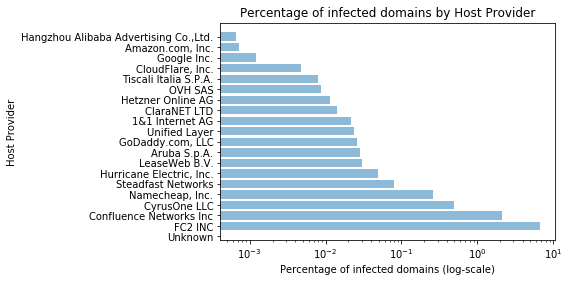

In [10]:
labels = top20merged['HostProvider']
plt.barh(labels, top20merged['Normalised'] * 100, align='center', alpha=0.5, log=True)
plt.ylabel('Host Provider')
plt.xlabel("Percentage of infected domains (log-scale)")
plt.title('Percentage of infected domains by Host Provider') 
plt.savefig('barchartHostVSInfections.png')

In [70]:
asn_country = ransomware_data[["ASN(s)","Country"]]
asn_country = asn_country.drop_duplicates(subset=['ASN(s)', 'Country'], keep="first")
# asn_country.loc[asn_country["ASN(s)"] == "26496"]

In [35]:
# Get ASN and country couples and count total infections
asn_country_dataset = ransomware_data[["ASN(s)", "Country"]]
asn_country_dataset = asn_country_dataset.groupby(["ASN(s)", "Country"]).size().reset_index(name="#infections")

top20ASN["ASN(s)"] = top20ASN["ASN(s)"].apply(str)
ASN_data["ASN(s)"] = ASN_data["ASN(s)"].apply(str)

# Get only the host providers of the top 20 list
asn_country_dataset = asn_country_dataset.loc[asn_country_dataset["ASN(s)"].isin(top20ASN["ASN(s)"])]
asn_country_dataset

# Map ASN to Host Provider names
hostprovider_country = pd.merge(asn_country_dataset, ASN_data[["ASN(s)", "HostProvider"]], on='ASN(s)', how='left')
hostprovider_country.sort_values(by=['HostProvider'], ascending=False)[:10]




,ASN(s),Country,#infections,HostProvider
29,46606,US,156,Unified Layer
41,8612,IT,155,Tiscali Italia S.P.A.
23,32748,US,131,Steadfast Networks
9,16276,FR,165,OVH SAS
14,16276,US,13,OVH SAS
13,16276,PL,13,OVH SAS
11,16276,IT,1,OVH SAS
10,16276,GB,12,OVH SAS
12,16276,NL,3,OVH SAS
8,16276,FI,1,OVH SAS


In [40]:
# Import rule of law csv
rol_data = pd.read_csv("RoL.csv", sep=',', parse_dates=True, header=0, encoding = "ISO-8859-1")
rol_data

,Country,RoL,CountryCode
0,Afghanistan,0.34,AF
1,Albania,0.51,AL
2,Antigua and Barbuda,0.63,AG
3,Argentina,0.58,AR
4,Australia,0.81,AU
5,Austria,0.81,AU
6,Bahamas,0.60,BS
7,Bangladesh,0.41,BD
8,Barbados,0.65,BB
9,Belarus,0.51,BY


In [39]:
# Merge with the rule of law csv on countriecodes
rol_dataset = pd.merge(hostprovider_country, rol_data[["RoL", "CountryCode"]], left_on="Country", right_on='CountryCode', how='left')
rol_dataset

,ASN(s),Country,#infections,HostProvider,RoL,CountryCode
0,13335,US,6,"CloudFlare, Inc.",0.73,US
1,14618,US,17,"Amazon.com, Inc.",0.73,US
2,15169,US,79,Google Inc.,0.73,US
3,16276,AR,2,OVH SAS,0.58,AR
4,16276,AU,1,OVH SAS,0.81,AU
5,16276,AU,1,OVH SAS,0.81,AU
6,16276,BR,1,OVH SAS,0.54,BR
7,16276,CA,20,OVH SAS,0.81,CA
8,16276,ES,8,OVH SAS,0.70,ES
9,16276,FI,1,OVH SAS,0.87,FI
